In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [16]:
#Datei einlesen und anzeigen:
df = pd.read_csv("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Data/Raw/Hotel/hotel_bookings.csv", encoding="ISO-8859-1", sep=',')

pd.set_option('display.max_columns', None)
df.head(10)
#print(df.columns)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [17]:
#Anzahl der Gäste pro Buchung addieren:
df["total_guest_number"]= df["adults"]+df["children"]+df["babies"]
df["duration_of_stay"]= df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df= df[df["duration_of_stay"]!=0]

In [18]:
#Spalten nach Hotels gruppieren:
hotel_grp=df.groupby(["hotel"])

#Verschiedene Besuchergruppen für das Resort Hotel zählen:
resort_total= hotel_grp.get_group("Resort Hotel")["total_guest_number"].sum()
resort_children= hotel_grp.get_group("Resort Hotel")["children"].sum()
resort_babies= hotel_grp.get_group("Resort Hotel")["babies"].sum()
resort_adults=hotel_grp.get_group("Resort Hotel")["adults"].sum()

print("Total number of guests in the Resort Hotel: " + str(resort_total))
print("Total number of children in the Resort Hotel: " + str(resort_children))
print("Total number of babies in the Resort Hotel: " + str(resort_babies))
print("Total nubmer of adults in the the Resort Hotel: " + str(resort_adults))

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3572926828.py:5: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3572926828.py:6: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3572926828.py:7: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3572926828.py:8: FutureWarning:

When grouping with a length-1 list-like, you will need to p

Total number of guests in the Resort Hotel: 79810.0
Total number of children in the Resort Hotel: 5120.0
Total number of babies in the Resort Hotel: 555
Total nubmer of adults in the the Resort Hotel: 74135


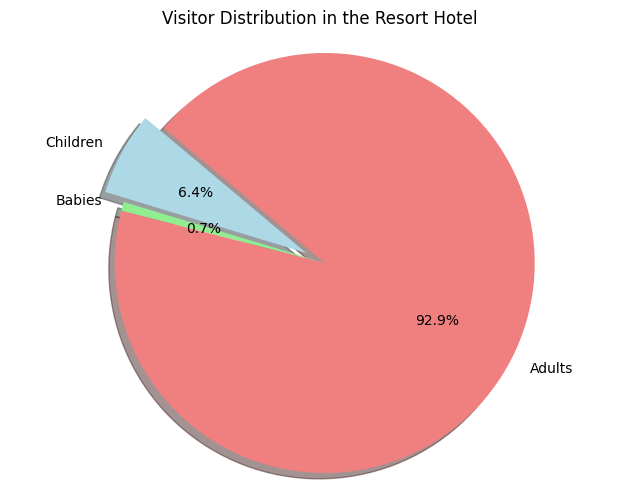

In [19]:
# Daten für das Tortendiagramm
labels = ['Children', 'Babies', 'Adults']
sizes = [resort_children, resort_babies, resort_adults]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Trennung des ersten Segments (Children)

# Erstellen des Tortendiagramms
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Visitor Distribution in the Resort Hotel')
plt.axis('equal')  # Gleichmäßige Aspekte gewährleisten

# Anzeigen des Diagramms
plt.show()

#Speichern:
#plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Visitor_Distribution_Resort.jpg", bbox_inches="tight", dpi=300)

In [20]:
#Verschiedene Besuchergruppen für das City Hotel zählen:
city_total= hotel_grp.get_group("City Hotel")["total_guest_number"].sum()
city_children= hotel_grp.get_group("City Hotel")["children"].sum()
city_babies= hotel_grp.get_group("City Hotel")["babies"].sum()
city_adults=hotel_grp.get_group("City Hotel")["adults"].sum()

print("Total number of guests in the City Hotel: " + str(city_total))
print("Total number of children in the City Hotel: " + str(city_children))
print("Total number of babies in the City Hotel: " + str(city_babies))
print("Total nubmer of adults in the the City Hotel: " + str(city_adults))

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/768840438.py:2: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/768840438.py:3: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/768840438.py:4: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/768840438.py:5: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Total number of guests in the City Hotel: 154011.0
Total number of children in the City Hotel: 7234.0
Total number of babies in the City Hotel: 389
Total nubmer of adults in the the City Hotel: 146397


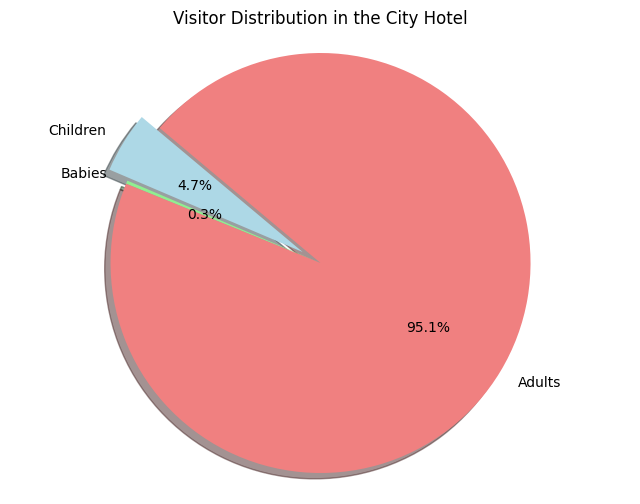

In [21]:
# Daten für das Tortendiagramm
labels = ['Children', 'Babies', 'Adults']
sizes = [city_children, city_babies, city_adults]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Trennung des ersten Segments (Children)

# Erstellen des Tortendiagramms
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Visitor Distribution in the City Hotel')
plt.axis('equal')  # Gleichmäßige Aspekte gewährleisten

# Anzeigen des Diagramms
plt.show()

#Speichern
#plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Visitor_Distribution_City.jpg", bbox_inches="tight", dpi=300)

In [22]:
#Mittelwert für die Gästezahl berechnen:
city_mean= hotel_grp.get_group("City Hotel")["total_guest_number"].mean()
resort_mean=hotel_grp.get_group("Resort Hotel")["total_guest_number"].mean()

print("The mean number of guests in the City Hotel is: " + str(city_mean))
print("the mean number of guests in the Resort Hotel is " + str(resort_mean))

The mean number of guests in the City Hotel is: 1.9496297234002151
the mean number of guests in the Resort Hotel is 2.0115435023691903


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3145264143.py:2: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3145264143.py:3: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [23]:

hotel_guests= resort_total + city_total

# Daten für das Sunburst-Diagramm
labels = [ "Hotel",'Resort', 'City', 'Resort Babies', 'Resort Children', 'Resort Adults', 'City Babies', 'City Children', 'City Adults']
parents = [" ", "Hotel", "Hotel", 'Resort', 'Resort', 'Resort', 'City', 'City', 'City']
values = [233821, 79810, 154011, 555, 5120, 74135, 389, 7234, 146397]

# Farben für die Sektoren
colors = ['rgba(255,255,255,0)',      # Weiß für den äußeren Ring (Hotel)
          'rgba(44,160,101,0.5)',     # Grün für Resort Hotel
          'rgba(255,65,54,0.5)',      # Rot für City Hotel
          'rgba(44,160,101,0.1)',     # Sehr hellgrün für Resort Babies
          'rgba(44,160,101,0.3)',     # Hellgrün für Resort Children
          'rgba(44,160,101,0.8)',     # Dunkelgrün für Resort Adults
          'rgba(255,65,54,0.1)',      # Sehr hellrot für City Babies
          'rgba(255,65,54,0.3)',      # Hellrot für City Children
          'rgba(255,65,54,0.8)']      # Dunkelot für City Adults

# Erstellen des Sunburst-Diagramms
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',  # Branchvalues: "total" zeigt die Summe aller Unterteilungen an
    marker=dict(colors=colors),
))

# Layout-Anpassungen
fig.update_layout(
    title='Verteilung der Gäste und Altersgruppen in den Hotels',
   margin=dict(t=50, l=50, r=50, b=50)) # Anpassen der Ränder

# Anzeigen des Diagramms
fig.show()

In [24]:

# Daten für das Sunburst-Diagramm
labels = [ "Hotel", 'Resort', 'City']
parents = [ '', 'Hotel', "Hotel"]
values = [ 233821,79810.00, 154011.00]

# Farben für die Sektoren
colors = ['rgba(255,255,255,0)',      # Weiß für den äußeren Ring (Hotel)
          'rgba(44,160,101,0.5)',     # Grün für Resort Hotel
          'rgba(255,65,54,0.5)',]     # Rot für City Hotel
          

# Erstellen des Sunburst-Diagramms
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',  # Branchvalues: "total" zeigt die Summe aller Unterteilungen an
    marker=dict(colors=colors),
))

# Layout-Anpassungen
fig.update_layout(
    title='Verteilung der Gäste und Altersgruppen in den Hotels',
   margin=dict(t=50, l=50, r=50, b=50),  # Anpassen der Ränder
    height=600,  
    width=800, )


# Anzeigen des Diagramms
fig.show()

In [25]:
#Wie lange bleiben Gäste mit Kindern in den Hotels:

# Entferne Zeilen mit Null-Werten in den Spalten "Children" oder "Babies"
df_children_only = df[(df['children'] != 0) & (df['babies'] != 0)]

#Neuen Dataframe wieder nach Hotels sortieren:
hotel_children_grp=df_children_only.groupby(["hotel"])

#Aufenthalt von Famililien für das Resort Hotel herausfinden:
stay_resort = hotel_children_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts().to_dict()

sorted_stay_resort = dict(sorted(stay_resort.items()))


#Aufenthalt von Familien für das City Hotel herausfinden:
stay_city = hotel_children_grp.get_group("City Hotel")["duration_of_stay"].value_counts().to_dict()

sorted_stay_city = dict(sorted(stay_city.items()))

#Werte ausgeben:
print(sorted_stay_resort)
print(sorted_stay_city)



{1: 13, 2: 14, 3: 10, 4: 7, 5: 20, 6: 9, 7: 19, 8: 5, 9: 5, 10: 1}
{1: 21, 2: 14, 3: 14, 4: 13, 5: 6, 7: 1, 8: 1, 11: 1, 18: 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/2491785351.py:10: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/2491785351.py:16: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



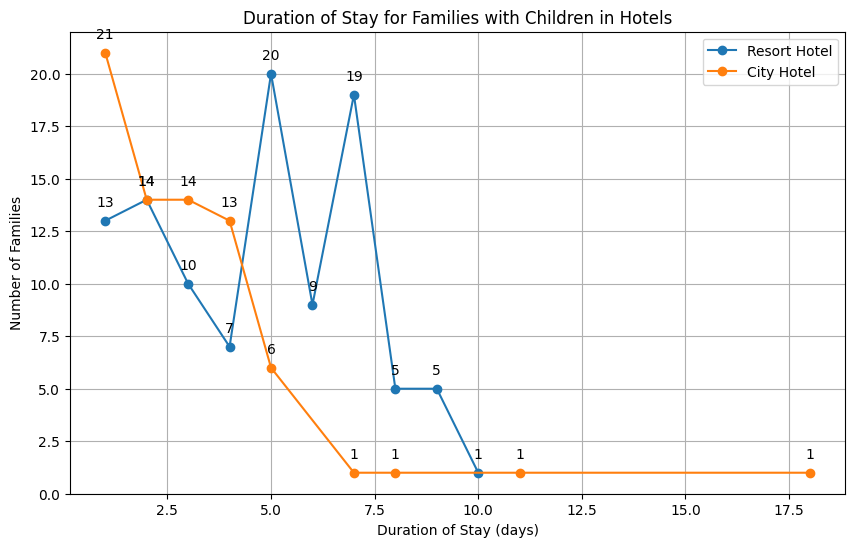

In [26]:
#Diagramm für die Aufenthaltsdauer der Familie erstellen:
# Daten für das Liniendiagramm
x_resort = list(sorted_stay_resort.keys())
y_resort = list(sorted_stay_resort.values())

x_city = list(sorted_stay_city.keys())
y_city = list(sorted_stay_city.values())

# Erstellen des Liniendiagramms
plt.figure(figsize=(10, 6))
plt.plot(x_resort, y_resort, marker='o', label='Resort Hotel')
plt.plot(x_city, y_city, marker='o', label='City Hotel')

# Diagrammtitel und Achsenbeschriftungen
plt.title('Duration of Stay for Families with Children in Hotels')
plt.xlabel('Duration of Stay (days)')
plt.ylabel('Number of Families')

# Legende anzeigen
plt.legend()

#Datenpunktbeschriftung hinzufügen:

# Annotate x-Werte für Resort Hotel
for x, y in zip(x_resort, y_resort):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Annotate x-Werte für City Hotel
for x, y in zip(x_city, y_city):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Anzeigen des Diagramms
plt.grid(True)
plt.show()

#plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Duration_of_Stay_Families.jpg", bbox_inches="tight", dpi=300)

Welche Monate sind für Familen besonders beliebt?

In [27]:
#Welche Monate sind im Resort Hotel beliebt?:

# Benutzerdefinierte Sortierreihenfolge für die Monate
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_resort = hotel_children_grp.get_group("Resort Hotel")["arrival_date_month"].value_counts().to_dict()

#sorted_month_resort = dict(sorted(month_resort.items(), key=lambda x: x[1], reverse=True))
sorted_month_resort = {month: sorted_month_resort.get(month, 0) for month in month_order}


#Welche Monate sind im City Hotel bliebt?:
month_city = hotel_children_grp.get_group("City Hotel")["arrival_date_month"].value_counts().to_dict()

#sorted_month_city = dict(sorted(month_city.items(), key=lambda x: x[1], reverse=True))
sorted_month_city = {month: sorted_month_city.get(month, 0) for month in month_order}


#Werte ausgeben:
print(sorted_month_resort)
print(sorted_month_city)

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_60543/3214788053.py:6: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



NameError: name 'sorted_month_resort' is not defined

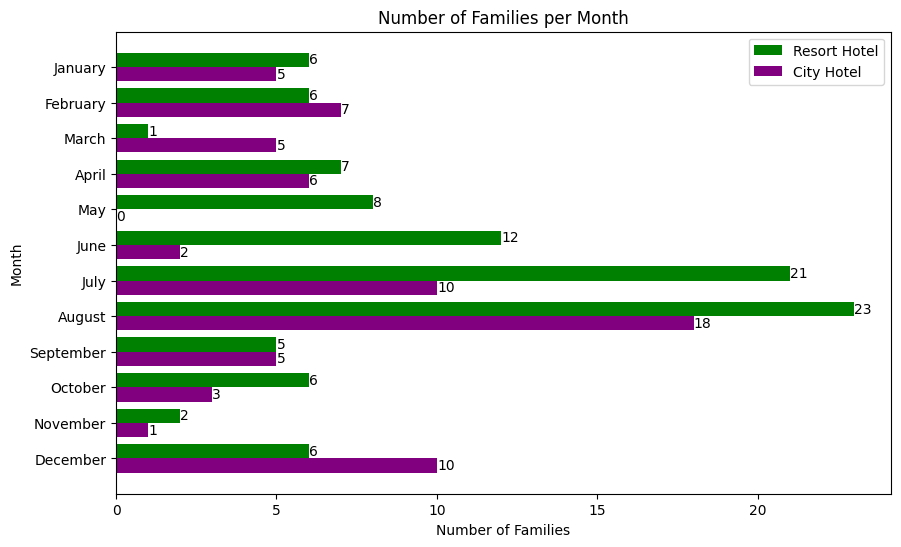

In [ ]:
# Daten für das Diagramm
months_resort = list(sorted_month_resort.keys())
families_resort = list(sorted_month_resort.values())

months_city = list(sorted_month_city.keys())
families_city = list(sorted_month_city.values())

# Erstellen des Diagramms
plt.figure(figsize=(10, 6)) # Größe des Diagramms anpassen

# Positionen für die Balken
positions_resort = np.arange(len(months_resort))
positions_city = np.arange(len(months_city))

# Breite der Balken
bar_width = 0.4

# Säulendiagramm für das Resort Hotel
plt.barh(positions_resort - bar_width/2, families_resort, bar_width, color='green', label='Resort Hotel')

# Säulendiagramm für das City Hotel
plt.barh(positions_city + bar_width/2, families_city, bar_width, color='purple', label='City Hotel')

# Beschriftung der Balken mit den Werten am Ende
for i, (month, family) in enumerate(sorted_month_resort.items()):
    plt.text(family, i - bar_width/2, str(family), ha='left', va='center')

for i, (month, family) in enumerate(sorted_month_city.items()):
    plt.text(family, i + bar_width/2, str(family), ha='left', va='center')

# Beschriftung der Achsen
plt.yticks(np.arange(len(months_resort)), months_resort)
plt.xlabel('Number of Families')
plt.ylabel('Month')
plt.title('Number of Families per Month')
plt.legend()

#Umkehren der X-Achse (Damit das Diagramm nicht im Dezember beginnt)
plt.gca().invert_yaxis()

# Diagramm anzeigen
plt.show()

#plt.savefig("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2-3/Code/Output/Figures/Families_per_month.jpg", bbox_inches="tight", dpi=300)

In [ ]:
#Wie verhalten sich die Buchungen ohne Kinder?

#Dataframe anpassen, damit alle Buchungen mit Kindern oder babies wegfallen:
df_without_children = df[(df['children'] == 0) & (df['babies'] == 0) & (df["adults"] != 0)] #zusätzlich alle Buchungen rausnehmen, in denen adults null sind, da haben wir offenbar keine Werte

# DataFrame nach der Spalte "Hotel" gruppieren
hotel_grp_adults = df_without_children.groupby("hotel")


#Wie viele Buchungen mit nur einer Person (Dienstreise?) gibt es im Hotel?
# Zählen, wie oft die Zahl 1 in der Spalte "adults" für jedes Hotel separat vorkommt
adults_count_resort_one = hotel_grp_adults.get_group("Resort Hotel")["adults"].value_counts().get(1, 0)
adults_count_city_one = hotel_grp_adults.get_group("City Hotel")["adults"].value_counts().get(1, 0)

# Ausgabe der Ergebnisse
print("Anzahl der Buchungen mit nur einer Person im Resort Hotel:", adults_count_resort_one)
print("Anzahl der Buchungen mit nur einer Person mit im City Hotel:", adults_count_city_one)

#Wie verhalten sich die Buchungen in Bezug auf die Anzahl von Erwachsenen Personen insgesamt?
adults_count_resort = hotel_grp_adults.get_group("Resort Hotel")["adults"].value_counts()
adults_count_city = hotel_grp_adults.get_group("City Hotel")["adults"].value_counts()

# Ausgabe der Ergebnisse
print("Resort Hotel:", adults_count_resort)
print(" City Hotel:", adults_count_city)





Anzahl der Buchungen mit nur einer Person im Resort Hotel: 6905
Anzahl der Buchungen mit nur einer Person mit im City Hotel: 15472
Resort Hotel: adults
2     27793
1      6905
3      1020
4        28
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64
 City Hotel: adults
2    53371
1    15472
3     4632
4       31
Name: count, dtype: int64
